In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import scipy 
import scipy.optimize as so


from scipy import odr
from uncertainties import unumpy, ufloat

We continue with the exercise from last week. Therefore I import the functions from last week. Furthermore I tried to correct the missing squares from last week in my functions


In [2]:
def atmo_event_rate(energy, cos_theta, sin2theta=0.9, dm2=2.4e-3):
    flux = 1e5*energy**-1.7 # the true neutrino flux is steeper, this takes into account 
                            # neutrino cross-section, which is proportional to E
                            # as well as that we are working with logarithmic energy bins    
    l = 12e3 * cos_theta # base line - max corresponds to diameter of the Earth 12e3 km

    # two flavor oscillation propability for muon disappearance - see wikipedia 
    osc_prop = 1-sin2theta * np.sin(1.27*dm2*l/energy)**2 

    return flux*osc_prop

def run_experiment(energy, cosdec, sin2theta=0.9, dm2=2.4e-3):
    x = np.array(energy.size)
    events=np.zeros(energy.size*cosdec.size)

    i = 0
    for e in energy:
        for c in cosdec:
            mu = atmo_event_rate(e,c,sin2theta,dm2)
            sig = np.sqrt(mu)
            event_random = np.random.normal(mu,sig)
            events[i] = int(event_random) 
            
            i=i+1
                   
    return events

In [3]:
def fit_arrays():
    
    

# lets generate one experiment, with 10 energy bins and 10 cos(declination) bins

    cosdec =  np.linspace(0, 1, 10) # 10 steps in cos(declination) from 0 to 1 
    log10_energy = np.linspace(1, 2, 10) # 10 steps in log10(energy) from 10 to 100 GeV
    energy=10**log10_energy

# run the experiment 
    events=run_experiment(energy,cosdec,0.9,2.4e-3)

# lets print the events per bin

    i = 0
    energy_array=np.zeros(0)
    cosdec_array=np.zeros(0)
    events_array=np.zeros(0)

    for e in energy:
        for c in cosdec:
            energy_array=np.append([energy_array],[e])
            cosdec_array=np.append([cosdec_array],[c])
            events_array=np.append([events_array],[events[i]])
        
        #print("energy, cosdec, events:",e,c, events[i])
            i=i+1
        
    return energy_array, cosdec_array, events_array

In [4]:
def func(p, X):
    sin2theta,dm2  = p
    energy, cos_theta= X
    return atmo_event_rate(energy, cos_theta, sin2theta, dm2)

I define a function to repeat the experiment and always calculate the chi2


In [5]:
len(fit_arrays()[0]) #number of data points

100

In [6]:
def repeat_experiment(N):
    
    
    
    chi2array=np.zeros(0)
    #N_R=0  
    
    for i in range(N):
        
    
        fit_daten=fit_arrays()
        fit_daten
    
    
        energy=fit_daten[0]
        cos_theta=fit_daten[1]
        y=fit_daten[2]  # y is the monte carlo data of flux*probability
    
    
    
        #def func(p, X):
        #    sin2theta,dm2  = p
        #    energy, cos_theta= X
        #return atmo_event_rate(energy, cos_theta, sin2theta, dm2)


        quad_model = scipy.odr.Model(func)
        data = scipy.odr.RealData((energy,cos_theta),y)
        odr = scipy.odr.ODR(data, quad_model, beta0=[0.9, 2.4e-3])
        odr.set_job(fit_type=2)
        out = odr.run()
        popt = out.beta
        perr = out.sd_beta
        #print("fit parameter 1-sigma error")
        #print("———————————–")
        #for i in range(len(popt)):
         #   print(str(popt[i])+" +- "+str(perr[i]*1/np.sqrt(out.res_var)))
        
        #if popt[0]>=0.9-sigma_sin2theta and popt[0]<=0.9+sigma_sin2theta and popt[1]>=2.4e-3-sigma_dm2 and popt[1]<=2.4e-3+sigma_dm2:
        #    N_R=N_R+1
        
        
        
        
        chi2=out.res_var*98
        
        #out.res_var gives chi2/dof so I need to multiply it with the degrees of freedom to get the chi2 value.
        #The dof are defined as dof=m-n with m the number of data points and n the number of fitted parameters.
        #We have m=100 data points and n=2 fit parameters, so we have dof =100-2=98
        
        chi2array=np.append([chi2array],[chi2])
        
    
    return chi2array

Now I repeat the calculation 1000 times


In [18]:
chi2=repeat_experiment(1000)
chi2

array([39258.25888235, 39442.2100779 , 42524.2191355 , 25906.98463415,
       36436.71259817, 29272.56564912, 31365.85157807, 33735.65722938,
       35076.88516166, 30183.08125671, 25564.7957656 , 36326.43913858,
       55859.61434274, 22790.79897871, 42703.19398688, 37787.36807   ,
       41184.48089044, 30034.40307568, 56414.46178823, 21179.97816775,
       39731.21667072, 38542.21208477, 31743.13033945, 39123.24723087,
       33024.22210524, 31501.35113182, 30904.99897535, 46924.33670946,
       31235.57005762, 28569.89726757, 45676.73239449, 35518.68540163,
       33303.19748189, 40113.80614127, 48074.23518483, 30031.41506171,
       39870.49591812, 42977.44337477, 49383.3777791 , 32097.6432481 ,
       26392.25987191, 38038.89096363, 36364.37893018, 41053.77425665,
       37086.6633381 , 36572.77489214, 38432.07227835, 55555.91898054,
       34215.8030799 , 43615.05738192, 40613.84906079, 46955.14675404,
       25948.01853148, 39722.20901861, 45581.34011978, 28216.30945873,
      

    
Now I plot the distribution:




In [19]:
np.sqrt(len(chi2))

31.622776601683793

(array([  2.,   8.,  24.,  36.,  80.,  78.,  97., 100., 104.,  97.,  90.,
         69.,  53.,  42.,  45.,  25.,  17.,   7.,  12.,   5.,   3.,   2.,
          0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([16269.7869973 , 18391.27013568, 20512.75327406, 22634.23641245,
        24755.71955083, 26877.20268921, 28998.68582759, 31120.16896597,
        33241.65210436, 35363.13524274, 37484.61838112, 39606.1015195 ,
        41727.58465788, 43849.06779627, 45970.55093465, 48092.03407303,
        50213.51721141, 52335.0003498 , 54456.48348818, 56577.96662656,
        58699.44976494, 60820.93290332, 62942.41604171, 65063.89918009,
        67185.38231847, 69306.86545685, 71428.34859523, 73549.83173362,
        75671.314872  , 77792.79801038, 79914.28114876, 82035.76428714]),
 <a list of 31 Patch objects>)

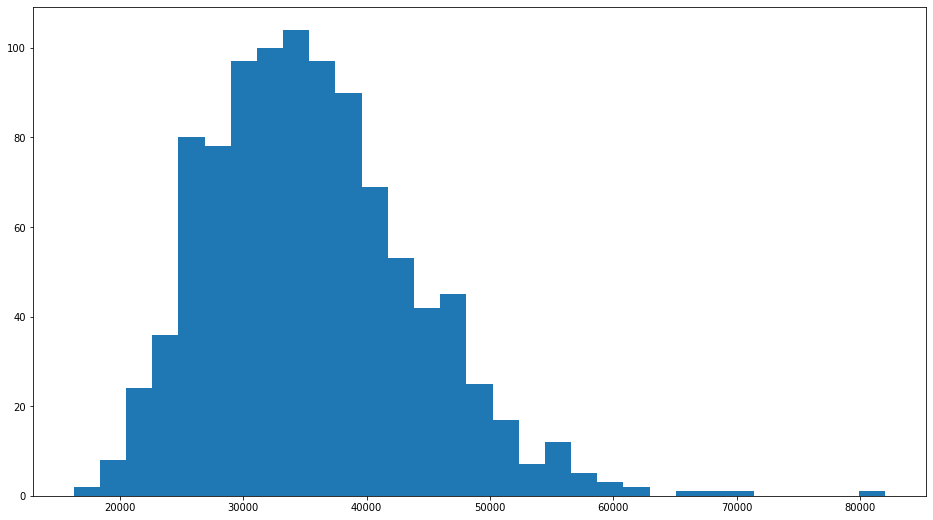

In [45]:
bins=np.linspace(np.min(chi2)-1, np.max(chi2)+1, num=32)

fig = plt.figure(figsize=(16, 9), dpi=72)
plt.hist(chi2, bins=bins)

In [68]:
x=np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    x[i]=np.abs(bins[i]+bins[i+1])/2
    
x 

array([17330.52856649, 19452.01170487, 21573.49484326, 23694.97798164,
       25816.46112002, 27937.9442584 , 30059.42739678, 32180.91053517,
       34302.39367355, 36423.87681193, 38545.35995031, 40666.84308869,
       42788.32622708, 44909.80936546, 47031.29250384, 49152.77564222,
       51274.2587806 , 53395.74191899, 55517.22505737, 57638.70819575,
       59760.19133413, 61881.67447251, 64003.1576109 , 66124.64074928,
       68246.12388766, 70367.60702604, 72489.09016442, 74610.57330281,
       76732.05644119, 78853.53957957, 80975.02271795])

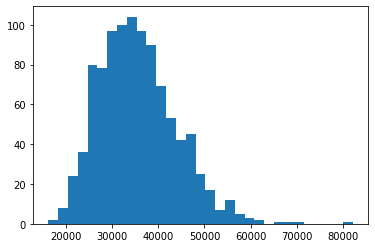

In [69]:
y=plt.hist(chi2, bins=bins)[0]

Now I want to normalize the histogram

In [70]:
np.sum(y)

1000.0

In [71]:
y=y/1000

Now I can fit a chi2 distribution to the histogram

C:\Users\mhage\anaconda3\lib\site-packages\ipykernel_launcher.py:17: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
C:\Users\mhage\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\mhage\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1741: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\mhage\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
C:\Users\mhage\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
C:\Users\mhage\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1742: RuntimeWarning: invalid value encountered in greater
  con

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.0008327                  │             Nfcn = 4182              │
│ EDM = 1.95e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
A=  2116.2028094168527
df=  98.4039553877762
loc=  -22449.223541872947
scale=  582.50953

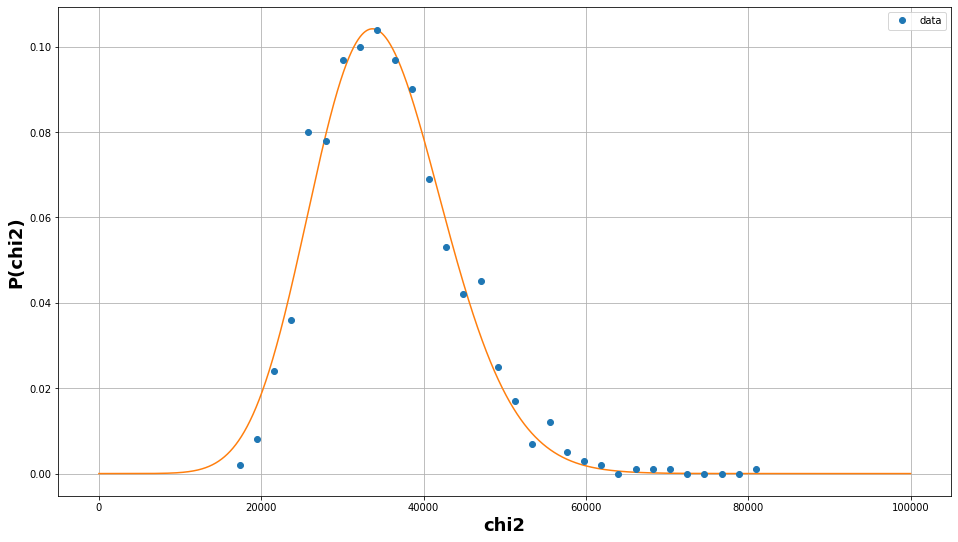

In [72]:
from scipy import stats
import iminuit
from iminuit import Minuit

y=y
x=x





def chi_squared(A,df,loc,scale):
    expectation = A*scipy.stats.chi2.pdf(x, df, loc, scale)
    return np.sum((expectation-np.array(y))**2)

minuit = Minuit(chi_squared,A=1500,df=98, loc=-15000, scale=500)
minuit.migrad()
minuit.hesse()
minuit.minos()

fit_parameters =  np.array([minuit.values[0],minuit.values[1],minuit.values[2],minuit.values[3]])
#errors =  np.array([minuit.errors[0], minuit.errors[1]])

# Make a plot of the best fit values in comparison to measurements
plt.figure(figsize=(16,9))
plt.errorbar(x, y, fmt="o", label="data")



fit_x = np.linspace(0,100000,100000)

plt.plot(fit_x,minuit.values[0]*scipy.stats.chi2.pdf(fit_x,minuit.values[1],minuit.values[2],minuit.values[3]))

plt.xlabel("chi2", weight="bold",fontsize="18")
plt.ylabel("P(chi2)", weight="bold",fontsize="18")
plt.legend()
plt.grid()



print(minuit.fmin)
print("A= ",minuit.values[0])
print("df= ",minuit.values[1])
print("loc= ",minuit.values[2])
print("scale= ",minuit.values[3])

Notice that the degrees of freedom is dof=98

Now I can plot this with the histogram

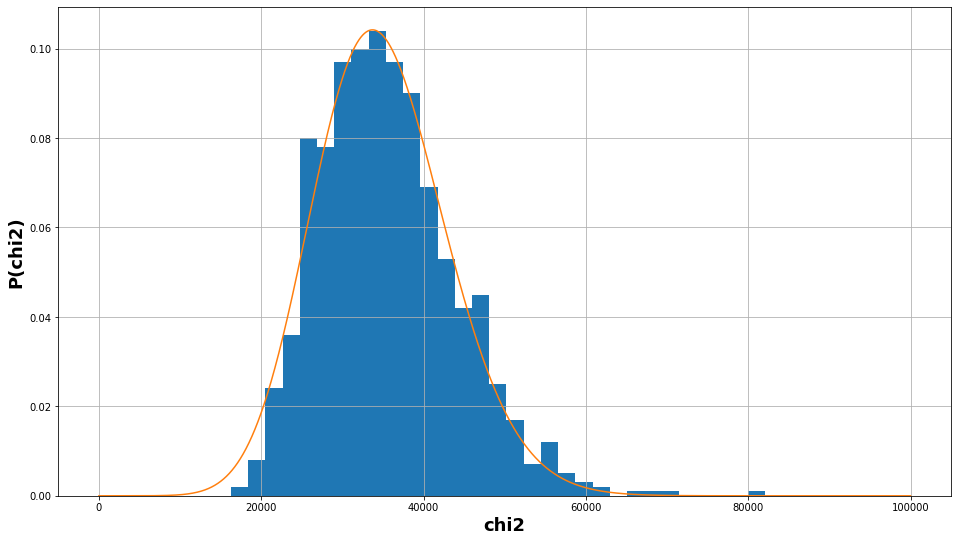

In [73]:
bins=np.linspace(np.min(chi2)-1, np.max(chi2)+1, num=32)

fig = plt.figure(figsize=(16, 9), dpi=72)
plt.hist(chi2, bins=bins,weights=np.ones(1000)*1/1000)  
plt.plot(fit_x,minuit.values[0]*scipy.stats.chi2.pdf(fit_x,minuit.values[1],minuit.values[2],minuit.values[3]))

plt.xlabel("chi2", weight="bold",fontsize="18")
plt.ylabel("P(chi2)", weight="bold",fontsize="18")
#plt.legend()
plt.grid()

Now I want to calculate the mean and the variance. Lets start with the mean for the histogram.

In [80]:
Mean_hist=np.sum(x*y)
Mean_hist

35602.862837375775

Now the variance of the histogram

In [106]:
Variance_hist=np.sum(y*(x-Mean_hist)**2/1)
Variance_hist

70585372.00864325

In [107]:
std_hist=np.sqrt(Variance_hist)
std_hist

8401.510102870987

Now we want to calculate the same values for the fitted chi2 distribution

In [108]:
Mean_pdf=np.sum(x*minuit.values[0]*scipy.stats.chi2.pdf(x,minuit.values[1],minuit.values[2],minuit.values[3]))
Mean_pdf

34708.03991585315

In [109]:
Variance_pdf=np.sum(minuit.values[0]*scipy.stats.chi2.pdf(x,minuit.values[1],minuit.values[2],minuit.values[3])*(x-Mean_pdf)**2/1)
Variance_pdf

64333227.07935126

In [110]:
std_pdf=np.sqrt(Variance_pdf)
std_pdf

8020.799653360708

The values are in similar regions

Finally we can calculate chi2 value that correspons to the cumulative 67 percent of the distribution. Therefore we can just look at the cumulative chi2 distribution with the same parameters.

In [117]:
from scipy import optimize

In [120]:
def cdf_67(x):
    return scipy.stats.chi2.cdf(x,minuit.values[1],minuit.values[2],minuit.values[3])-0.67

In [122]:
scipy.optimize.root(cdf_67,x0=30000)

    fjac: array([[-1.]])
     fun: array([3.33066907e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.35165229e-12])
       r: array([-4.26873751e-05])
  status: 1
 success: True
       x: array([38140.36749787])

67% of the chi2 values are 38140.367 or smaller

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now part 2 of the exercise: Covid-19 self-testing and Bayesian theorem

1)The two errors where defined in the lecture in the following way:
<br>
<br>
Type 1 error: Reject a true hypothesis <br>
Type 2 error: Accept a false hypothesis

The fact that the test shows a positive result despite no infection in 1% of the time is a Type 2 error, because one will accept the false hypothesis of an infection.

2) Now we want to calculate the probability to be healthy. For this we want to use Bayes theorem.

Bayes theorem states: $$P(A|B)=\Big(\frac{P(B|A)\cdot P(A)}{P(B)}\Big)$$

So now lets assume we perform a Covid-test. How probable is it to be healthy taking into account how many people are infected with Covid-19.

First lets assume the test is positive. The probability to be healthy despite apositive test is then given by:
<br>
<br>
$$P(healthy|positivetest)=\Big(\frac{P(positivetest|healthy)\cdot P(healthy)}{P(positivetest)}\Big)$$

with $$P(positivetest|healthy)=0.01$$

and $$P(positivetest)=P(positivetest|healthy)\cdot P(healthy)+P(positivetest|nothealthy)\cdot P(nothealthy)$$

$$P(positivetest|nothealthy)=0.6$$

P(healthy) and P(nothealthy) are given by the probability due to the amount of infections in the genreal population. And they are connected via $$P(healthy)=1-P(nothealthy)$$

So now I can define a function:

In [3]:
def healthy_despite_positive_test(P_not_healthy,P_positive_healthy=0.01, P_positive_nothealthy=0.6):
    P_healthy=1-P_not_healthy
    P_healthy_positive=(P_positive_healthy*P_healthy)/(P_positive_healthy*P_healthy+P_positive_nothealthy*P_not_healthy)
    
    return P_healthy_positive

In [4]:
Test=np.linspace(10**(-6),1,1000000)

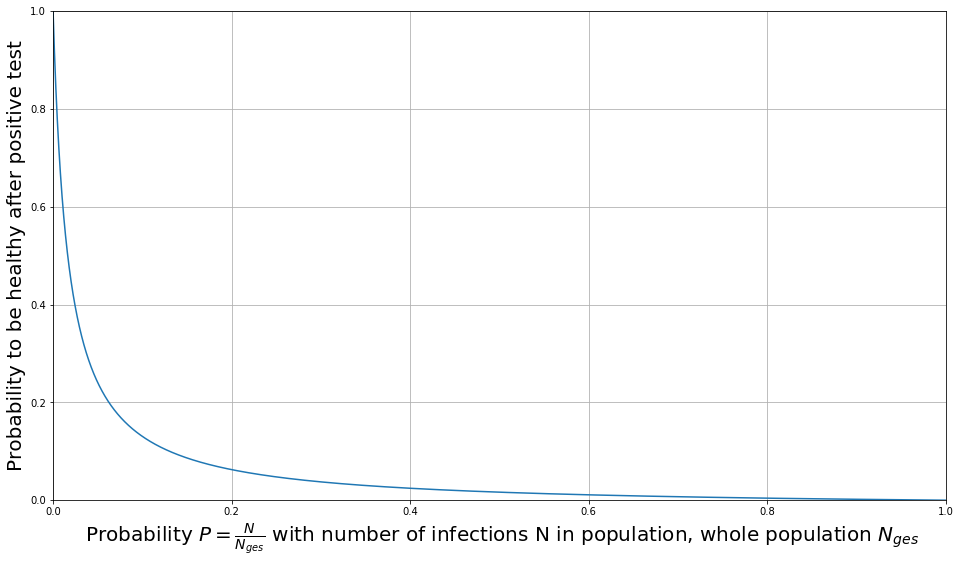

In [12]:
fig = plt.figure(figsize=(16, 9), dpi=72)
plt.plot(Test,healthy_despite_positive_test(Test,P_positive_healthy=0.01, P_positive_nothealthy=0.6))
plt.xlabel(r" Probability $P=\frac{N}{N_{ges}}$ with number of infections N in population, whole population $N_{ges}$",fontsize=20)
plt.ylabel("Probability to be healthy after positive test",fontsize=20)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

Now lets consider we get a negative test result

The probability to be healthy after a negative test is then given by:
<br>
<br>
$$P(healthy|negativetest)=\Big(\frac{P(negativetest|healthy)\cdot P(healthy)}{P(negativetest)}\Big)$$

with $$P(negativetest|healthy)=0.99$$

and $$P(negativetest)=P(negativetest|healthy)\cdot P(healthy)+P(negativetest|nothealthy)\cdot P(nothealthy)$$

and $$P(negativetest|nothealthy)=0.4$$

Again we have P(healthy) and P(nothealthy) are given by the probability due to the amount of infections in the genreal population. And they are connected via $$P(healthy)=1-P(nothealthy)$$

So I can define the new function in that case

In [6]:
def healthy_after_negative_test(P_not_healthy,P_negative_healthy=0.99, P_negative_nothealthy=0.4):
    P_healthy=1-P_not_healthy
    P_healthy_negative=(P_negative_healthy*P_healthy)/(P_negative_healthy*P_healthy+P_negative_nothealthy*P_not_healthy)
    
    return P_healthy_negative

In [7]:
Test=np.linspace(10**(-6),1,1000000)

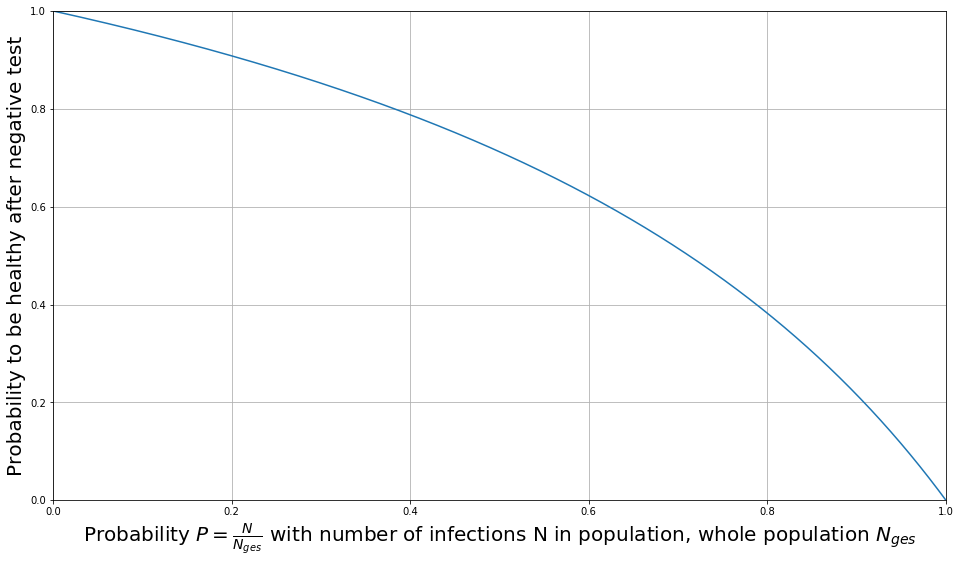

In [11]:
fig = plt.figure(figsize=(16, 9), dpi=72)
plt.plot(Test,healthy_after_negative_test(Test,P_negative_healthy=0.99, P_negative_nothealthy=0.4))
plt.xlabel(r"Probability $P=\frac{N}{N_{ges}}$ with number of infections N in population, whole population $N_{ges}$",fontsize=20)
plt.ylabel("Probability to be healthy after negative test",fontsize=20)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()